In [54]:
"""
Calculate impedence and resonant frequency of various LC 

17-Dec-22   CBL Original
"""
import numpy as np
import matplotlib.pyplot as plt
import math

In [84]:
# define a global constant
mPerIn = 0.0254  # meters per inch

def F0(L,C):
    """ 
    return resonant frequency from L and C inputs
    @L input inductance (Henrys)
    @C input capacitance (Farads)
    """
    F = 1.0/(2.0 * np.pi * np.sqrt(L*C))
    return F*1.0e-6   # in MHz

def Z0(L,C):
    """ 
    return impedence from L and C inputs
    @L input inductance (Henrys)
    @C input capacitance (Farads)
    """
    return np.sqrt(L/C)  # in ohms

def Z_L(F, L):
    """
    return Z from L
    @F input frequency in Hz
    @L input inductance (Henrys)
    """
    return 2.0*np.pi*L


def Z_C(F, C):
    """
    return Z from C
    @F input frequency in Hz
    @C input capacitance in Farads
    """
    return 1.0/(2.0*np.pi*C)

def Q( R, L, C):
    """ return Q
    @R - resistance in Ohms
    @L - inductance in Henrys
    @C - capacitance in Farads
    """
    return 1.0/(R*np.sqrt(C/L))
    
def LoopInductance(R, wd):
    """
    Calculate the inductance of a loop. 
    @R - radius of ring in meters
    @wd - diameter of wire in meters
    Taken from "Reference Data for Radio Engineers, third edition", 1943, Page 90
    AWG - https://www.powerstream.com/Wire_Size.htm
    """
    a = R/mPerIn       # convert from meters to inches for loop radius
    d = wd/mPerIn/2.0  #
    L = a/100.0 * (7.353 * np.log10(16.0*a/d) - 6.386) # microhenrys
    return L

def CFromFL(F,L):
    """ 
    return C in Farads 
    @F - frequency (Hz)
    @L - Inductance (H)
    """
    return 1.0/(L*np.power(2.0*np.pi*F,2.0))

def LoopArea(R):
    """
    Return the Loop area in M. 
    R - radius of loop in meters
    """
    return np.pi*np.power(R,2.0)


Taken from "Reference Data for Radio Engineers, third edition", 1943, Page 90. Self inductance of a circular Ring
of round wire at radio frequencies. <br>
$L = {a\over{100}} [7.353 log_{10}({16a\over{d}}-6.386)]$
<br>
where:
a = mean radius of ring in inches
d = diameter of wire in inches and
$ {a\over{d}} > 2.5 $
<br>

In [73]:
"""
Looking at active antenna design. 
"""
Cinline  = 12.0e-12
CLow     = 20.0e-12 
CHigh    = 322.0e-12 
L        = [ 1000.0e-6, 180e-6, 22e-6, 3.3e-6, 0] # Henrys, I don't really know the last one
L_inline = 1.0e-8

for i in range(5):
    print(i, ' L: ', L[i], ' F high: ', F0(L[i]+L_inline,CLow+Cinline), ' F Low: ', F0(L[i]+L_inline, CHigh+Cinline))

0  L:  0.001  F high:  0.8896987307889387  F Low:  0.2753878191362461
1  L:  0.00018  F high:  2.0969922553777574  F Low:  0.6490805302621865
2  L:  2.2e-05  F high:  5.9970148079148515  F Low:  1.8562517536863028
3  L:  3.3e-06  F high:  15.464331313136897  F Low:  4.786663538284187
4  L:  0  F high:  281.34884879909566  F Low:  87.08571025898972


not quite right but doesn't take into account parasitic capacitances. This is all based on the input to a MFJ-1020C
active antenna. Discontinued. 

Loop inductance:  1.5969046697822843e-06  Henrys, Frequency:  28.16213904263174  Impedence:  282.5689889020276
N:  34


Text(0, 0.5, 'Frequency (Mhz)')

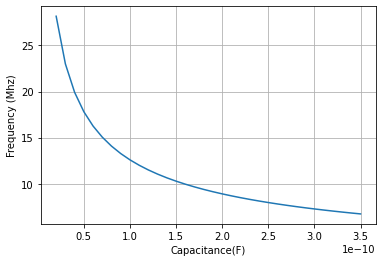

In [74]:
# Look at a loop antenna 
# https://l-36.com/Copper_tube.php
D5  = 0.625 * mPerIn # 1/2 copper type K in inches
D25 = 0.265 * mPerIn # 1/4 copper type K in inches
R   = 0.25  # radius of loop in meters

a = R/mPerIn       # convert from meters to inches for loop radius
d = D25/mPerIn/2.0  #

L = LoopInductance(R, D25) * 1.0e-6
C = 20.0e-12
print('Loop inductance: ', L, ' Henrys, Frequency: ', F0(L,C), ' Impedence: ', Z0(L,C))
start = 20.0
stop  = 360.0
step  = 10.0
N     = int((stop-start)/step)
print('N: ', N)
Fs = np.zeros(N)
C0 = np.zeros(N)
Z  = np.zeros(N)
Q0 = np.zeros(N)
x  = start

for i in range(N):
    Ct    = x * 1.0e-12
    C0[i] = Ct
    Fs[i] = F0(L, Ct)
    Z[i]  = Z0(L,Ct)
    Q0[i] = Q(0.1, L, Ct)
    #print("Z ", Z[i])
    x = x + step

plt.plot(C0, Fs)
plt.grid(True)
plt.xlabel('Capacitance(F)')
plt.ylabel('Frequency (Mhz)')

Text(0.5, 0, 'Frequency (Mhz)')

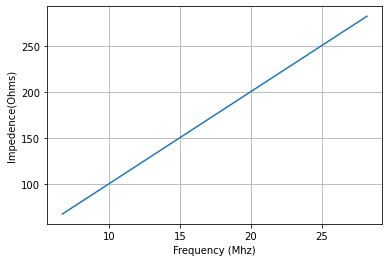

In [75]:
plt.plot(Fs,Z)
plt.grid(True)
plt.ylabel('Impedence(Ohms)')
plt.xlabel('Frequency (Mhz)')

Text(0.5, 0, 'Frequency (Mhz)')

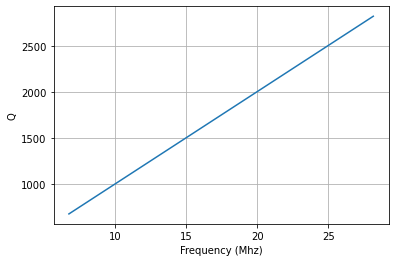

In [76]:
plt.plot(Fs,Q0)
plt.grid(True)
plt.ylabel('Q')
plt.xlabel('Frequency (Mhz)')

Q is definitely not correct.

In [92]:
# What would C be for FM broadcast band for a loop? 
R   = 0.05  # radius of loop in meters
LFM = LoopInductance(R, D25) * 1.0e-6
F1 = 88.0e6
F2 = 108.0e6
C1 = CFromFL(F1,LFM)
Z1 = Z0(LFM, C1)
print('F1: ', F1, " C: ", C1, ' Z: ',Z1)
C2 = CFromFL(F2,LFM)
Z2 = Z0(LFM, C2)
print('F2: ', F2, " C: ", C2,' Z:', Z2)
A1 = LoopArea(R)
A2 = LoopArea(0.032)
print('Transformed Z:',Z1*A2/A1)

F1:  88000000.0  C:  1.49900110928032e-11  Z:  120.65227220811384
F2:  108000000.0  C:  9.9522158695703e-12  Z: 148.07324316450337
Transformed Z: 49.41917069644342
